In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
df = pd.read_csv('/content/sentiment_dataset (2) (1).csv')
df.head(5)

,val,id,timestamp,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.isnull().sum()

val          0
id           0
timestamp    1
query        1
username     1
tweet        1
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.duplicated().any()

False

# 1. Data cleaning and preprocessing

In [6]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

stop_words = set(stopwords.words('english'))
tokenizer = TweetTokenizer()

def clean_tweet(tweet):
    tweet = tweet.lower()  # Converting to lowercase
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # Removing URLs
    tweet = re.sub(r'\@\w+|\#', '', tweet)  # Removing mentions and hashtags
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))  # Removing punctuations
    tweet_tokens = tokenizer.tokenize(tweet)  # Tokenization
    filtered_words = [word for word in tweet_tokens if word not in stop_words]  # Removing stop words
    return " ".join(filtered_words)  # Join tokens back to string

df['cleaned_tweet'] = df['tweet'].apply(clean_tweet)

print(df['cleaned_tweet'].head())


0        thats bummer shoulda got david carr third day
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                             behaving im mad cant see
Name: cleaned_tweet, dtype: object


In [8]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment)

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sentiment_1'] = label_encoder.fit_transform(df['sentiment'])


# 2. Exploratory data analysis to understand the distribution of sentiments.

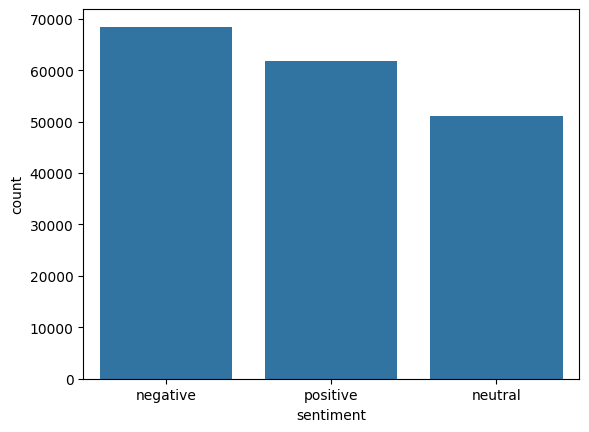

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.show()

# 3. Feature extraction using TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_tweet']).toarray()
y = df['sentiment']


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Training and evaluating multiple machine learning model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print('Logistic Regression Results:')
print(classification_report(y_test, y_pred_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))
print('Accuracy:', accuracy_score(y_test, y_pred_lr))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89     13677
     neutral       0.90      0.94      0.92     10188
    positive       0.89      0.88      0.88     12404

    accuracy                           0.89     36269
   macro avg       0.89      0.90      0.90     36269
weighted avg       0.89      0.89      0.89     36269

Confusion Matrix:
[[11945   620  1112]
 [  349  9551   288]
 [  985   497 10922]]
Accuracy: 0.893821169593868
